# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fahryan Raihan Hakim
- **Email:** fahryanraihanh@gmail.com
- **ID Dicoding:** fahryan_raihan_xquk

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap total penyewaan sepeda?
- Bagaimana tren (demand) dari penyewaan sepeda di berbagai musim dan waktu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode diatas berhasil memuat dataset Bike Sharing dari file hour.csv ke dalam sebuah DataFrame pandas yang diberi nama hour_df.
- DataFrame tersebut berisi 17 kolom dengan 17.379 baris. 

### Assessing Data

In [3]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- info() digunakan memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df
- describe() digunakan untuk memeriksa parameter statistik dari hour_df.
- Tidak ada missing value, inaccurate data, maupun duplicate data. Namun terdapat kesalahan tipe data untuk kolom dteday

### Cleaning Data

In [5]:
datetime_columns = ['dteday']
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- to_datetime() mengganti tipe data pada kolom dteday menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [7]:
hour_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [8]:
# Statistics summary for weather-related column and bike rental  
weather_summary = hour_df[['temp', 'hum', 'windspeed', 'cnt']].describe()
print(weather_summary)

               temp           hum     windspeed           cnt
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.627229      0.190098    189.463088
std        0.192556      0.192930      0.122340    181.387599
min        0.020000      0.000000      0.000000      1.000000
25%        0.340000      0.480000      0.104500     40.000000
50%        0.500000      0.630000      0.194000    142.000000
75%        0.660000      0.780000      0.253700    281.000000
max        1.000000      1.000000      0.850700    977.000000


In [9]:
# Group by weather situation to see its effect on bike rental on average
weather_effect = hour_df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
print(weather_effect)

weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


In [10]:
# Grouping data by 'season' and 'hr' to find average bike rentals per hour across seasons
season_hour_trend = hour_df.groupby(['season', 'hr'])['cnt'].mean().reset_index()

In [11]:
# Sorting by season and hour 
season_hour_trend_sorted = season_hour_trend.sort_values(by = ['season', 'hr'])
print(season_hour_trend_sorted)

    season  hr         cnt
0        1   0   27.404494
1        1   1   18.140449
2        1   2   12.794118
3        1   3    7.102564
4        1   4    3.181818
..     ...  ..         ...
91       4  19  297.033898
92       4  20  212.141243
93       4  21  161.327684
94       4  22  123.564972
95       4  23   86.440678

[96 rows x 3 columns]


In [12]:
# Descriptive statistics for season and hour trends
season_hour_trend_summary = season_hour_trend.describe()
print(season_hour_trend_summary)

          season         hr         cnt
count  96.000000  96.000000   96.000000
mean    2.500000  11.500000  187.891609
std     1.123903   6.958524  141.614146
min     1.000000   0.000000    3.181818
25%     1.750000   5.750000   56.715127
50%     2.500000  11.500000  183.178849
75%     3.250000  17.250000  278.720109
max     4.000000  23.000000  572.138298


**Insight:**
- weathersit = 1 yaitu ketika kondisi cuaca cerah atau sedikit berawan memiliki total penyewaan sepeda tertinggi 
- weathersit = 4 yaitu ketika kondisi cuaca hujan deras atau hujan petir, dsb memiliki total penyewaan terendah

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pengaruh cuaca terhadap total penyewaan sepeda? berikut scatter plot untuk mengetahuinya

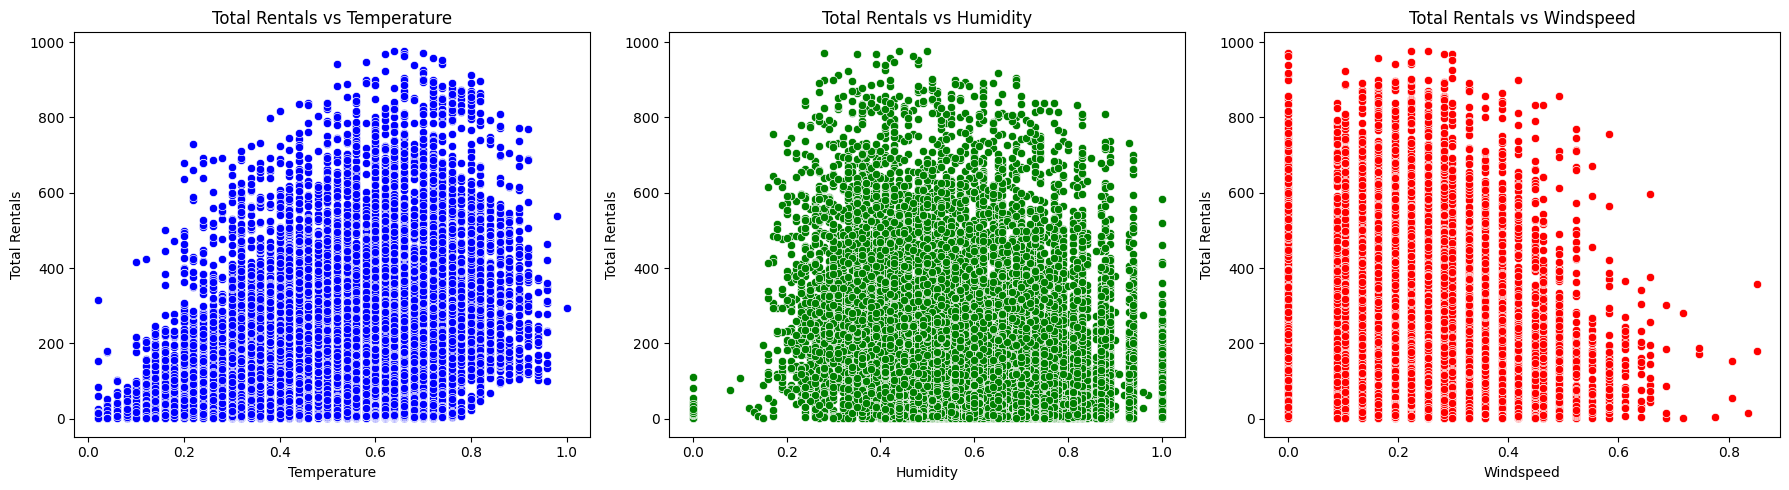

In [13]:
# Figure size
plt.figure(figsize = (18, 5))

# Scatter plot 1: Total Rentals vs Temperature
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'temp', y = 'cnt', data = hour_df, color = 'blue')
plt.title("Total Rentals vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Total Rentals")

# Scatter plot 2: Total Rentals vs Humidity
plt.subplot(1, 3, 2)
sns.scatterplot(x = 'hum', y = 'cnt', data = hour_df, color = 'green')
plt.title("Total Rentals vs Humidity")
plt.xlabel("Humidity")
plt.ylabel("Total Rentals")

# Scatter plot 3: Total Rentals vs Windspeed
plt.subplot(1, 3, 3)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = hour_df, color = 'red')
plt.title("Total Rentals vs Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Total Rentals")

plt.tight_layout()
plt.show()

### Pertanyaan 2:
Bagaimana tren (demand) dari penyewaan sepeda di berbagai musim dan waktu dalam sehari? Berikut line chart untuk mengetahuinya

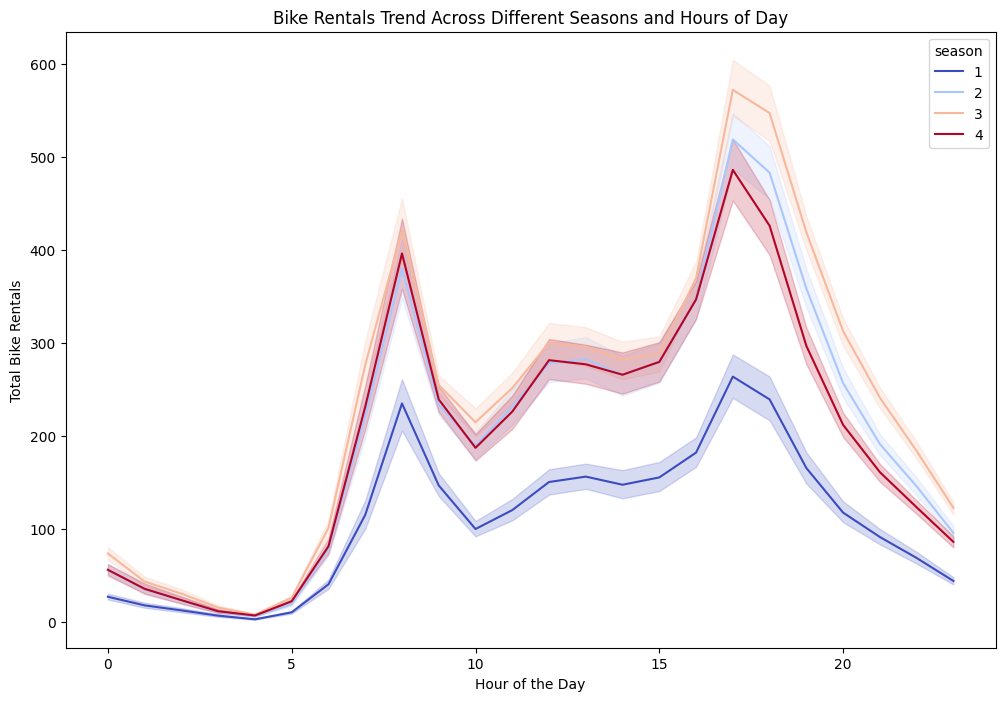

In [14]:
# Figure size
plt.figure(figsize = (12, 8))

# Line chart
sns.lineplot(x = 'hr', y = 'cnt', hue = 'season', data = hour_df, palette = 'coolwarm')

plt.title("Bike Rentals Trend Across Different Seasons and Hours of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Bike Rentals")

plt.show()

**Insight:**
- Suhu (temp) yang lebih tinggi menyebabkan peningkatan jumlah penyewaan, sementara kelembapan (hum) dan kecepatan angin(windspeeed) yang lebih tinggi menyebabkan penurunan jumlah penyewaan. 
- Penyewaan tertinggi terjadi selama musim panas dan pada jam-jam sibuk (pagi saat berangkat kerja dan sore hari saat pulang kerja)

## Analisis Lanjutan (Opsional)

Berikut merupakan bentuk gabungan dari 3 scatter plot pada pertanyaan pertama

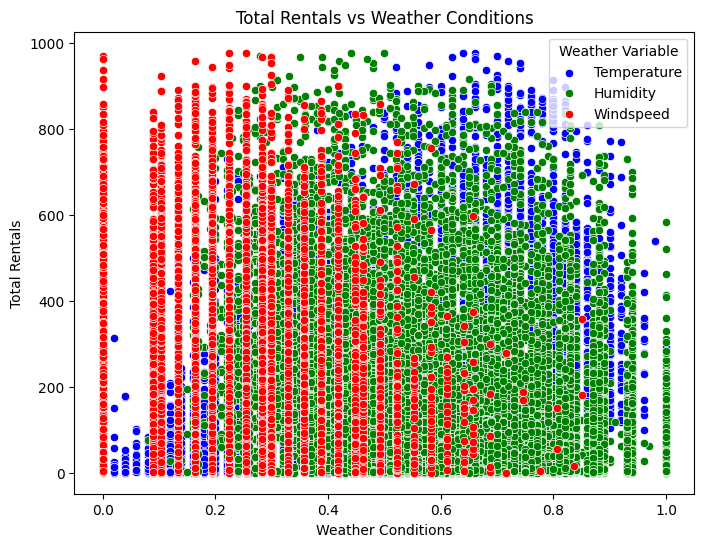

In [15]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x = 'temp', y = 'cnt', data = hour_df, color = 'blue', label = 'Temperature')
sns.scatterplot(x = 'hum', y = 'cnt', data = hour_df, color = 'green', label = 'Humidity')
sns.scatterplot(x = 'windspeed', y = 'cnt', data = hour_df, color = 'red', label = 'Windspeed')

plt.title("Total Rentals vs Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Total Rentals")

plt.legend(title= "Weather Variable", loc='upper right')
plt.show()

## Conclusion

- Untuk pertanyaan 1, kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.  
- Ini menunjukkan bahwa cuaca yang nyaman mendorong lebih banyak aktivitas berbagi sepeda.
- Untuk pertanyaan 2, jumlah penyewaan sepeda menunjukkan pola musiman dan harian yang cukup jelas.
- Hal ini menunjukkan bahwa layanan penyewaan sepeda cukup populer untuk perjalanan harian dan dipengaruhi oleh cuaca serta waktu.